<a href="https://colab.research.google.com/github/Erifai/Bi_Project/blob/main/Copie_de_Projet_BI_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.6 MB 78 kB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [18]:

#!pip install spacy
!pip install -U spacy 
!pip install spacy-transformers
!pip install spacy_entity_linker
!python3 -m spacy_entity_linker "download_knowledge_base"

#à executer une seule fois et de redémarrer le runtime avec GPU 

     |████████████████████████████████| 51 kB 133 kB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
import string
import re
import operator
from functools import reduce


In [2]:
#df = pd.read_fwf('/content/DBLP_Subset.txt')
#df=pd.read_table('/content/DBLP_Subset.txt',header=None)
#df = pd.read_csv("/content/DBLP_Subset.txt",sep="\n")
reading_file = open("/content/DBLP_Subset.txt", "r")

new_file_content = ""
count = 0
for line in reading_file:

  stripped_line = line.strip()

  new_line = stripped_line.replace(';',',')
  if "#!" in new_line :
    count=0
  new_line = new_line.replace('#c',';').replace('#*','\n;').replace('#c',';').replace('#t',';').replace('#index',';').replace('#!',';').replace('#@',';')
  if "#%" in new_line and count==0 :
    #print(new_line)
    new_line = new_line.replace('#%',';')
    #print(new_line)

    count =1


  new_file_content += new_line


reading_file.close()
df = pd.DataFrame([x.split(';') for x in new_file_content.split('\n')])
# .replace('#c',';').replace('#*',';').replace('#c%',';').replace('#t',';').replace('#index',';').replace('#!',';')
#   df = pd.DataFrame([x.split(';') for x in lines.split('\n')])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37964 entries, 0 to 37963
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       37964 non-null  object
 1   1       37963 non-null  object
 2   2       37963 non-null  object
 3   3       37963 non-null  object
 4   4       37963 non-null  object
 5   5       37963 non-null  object
 6   6       20875 non-null  object
 7   7       17852 non-null  object
dtypes: object(8)
memory usage: 2.3+ MB


In [4]:
df = df.rename(columns={0:"supprimer",1:"Titre",2:"Auteurs",3:"Année",4:"Publication",5:"IndexId",6:"IdRefrences",7:"Abstract"})

In [5]:
df = df.drop(columns=['supprimer'])


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37964 entries, 0 to 37963
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Titre        37963 non-null  object
 1   Auteurs      37963 non-null  object
 2   Année        37963 non-null  object
 3   Publication  37963 non-null  object
 4   IndexId      37963 non-null  object
 5   IdRefrences  20875 non-null  object
 6   Abstract     17852 non-null  object
dtypes: object(7)
memory usage: 2.0+ MB


In [7]:
df = df.dropna(subset=['Abstract'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17852 entries, 1 to 37963
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Titre        17852 non-null  object
 1   Auteurs      17852 non-null  object
 2   Année        17852 non-null  object
 3   Publication  17852 non-null  object
 4   IndexId      17852 non-null  object
 5   IdRefrences  17852 non-null  object
 6   Abstract     17852 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [ ]:
#df.to_csv("df.csv", sep=';', encoding='utf-8')

In [ ]:
#df = pd.read_csv("/content/df.csv", sep = ";",header=None, names=["Titre","Auteurs","Année","Publication","IndexId","IdRefrences","Abstract"])

In [ ]:
#df.info()

In [8]:
df = df[0:1000]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Titre        1000 non-null   object
 1   Auteurs      1000 non-null   object
 2   Année        1000 non-null   object
 3   Publication  1000 non-null   object
 4   IndexId      1000 non-null   object
 5   IdRefrences  1000 non-null   object
 6   Abstract     1000 non-null   object
dtypes: object(7)
memory usage: 62.5+ KB


In [10]:
#punctuations
punctuations = string.punctuation
#stopwords
stop_words = list(STOP_WORDS)
def clean_text(
  string : str,
  ponctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~',
  stop_words = stop_words)->str : 

  #URLs
  string = re.sub(r"https?://\S+|www\.\S+",'',string)
  #html 
  string = re.sub(r'<.*?>','',string)
  #Numbers
  string = re.sub(r'[0-9]+','',string) 

  #Remove punctuations
  for x in string.lower():
    if x in punctuations:
      string = string.replace(x,"")
  #To lower
  string = string.lower()
  #Remove stop words
  string = ' '.join([word for word in string.split() if word not in stop_words])
  #Cleaning the whitespaces
  string = re.sub(r'\s', ' ', string).strip()
  return string
  


<function matplotlib.pyplot.show>

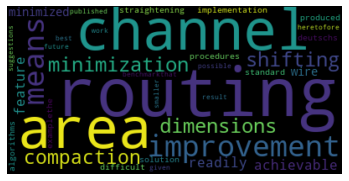

In [11]:

abstract = df.Abstract.to_list()
abstracts_cleaned = [clean_text(x) for x in abstract]
#wordcloud for one document
text = abstracts_cleaned[0]
#Creat and generate a wordcloud image :
wordcloud = WordCloud().generate(text)
#Display the generated image
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
abstract = df.Abstract.to_list()
abstracts_cleaned = [clean_text(x) for x in abstract]


In [12]:
len(abstracts_cleaned)

1000

In [13]:
vectorizer = CountVectorizer()
DocTerm_abstract = vectorizer.fit_transform(abstracts_cleaned)
print('type of DocTerm_abstract : ', type(DocTerm_abstract))
print("Documents / Mots  : ",DocTerm_abstract.shape)
print(DocTerm_abstract)

DocTerm_abstract = DocTerm_abstract.toarray()
print("******************************************")
print('DocTerm_abstract', type(DocTerm_abstract))


type of DocTerm_abstract :  <class 'scipy.sparse.csr.csr_matrix'>
Documents / Mots  :  (1000, 11828)
  (0, 1459)	2
  (0, 9112)	3
  (0, 640)	2
  (0, 5024)	1
  (0, 6249)	1
  (0, 6457)	1
  (0, 9486)	1
  (0, 2965)	1
  (0, 1762)	1
  (0, 8569)	1
  (0, 78)	1
  (0, 3936)	1
  (0, 6465)	1
  (0, 11697)	1
  (0, 10088)	1
  (0, 4975)	1
  (0, 301)	1
  (0, 8178)	1
  (0, 8229)	1
  (0, 9772)	1
  (0, 2863)	1
  (0, 2942)	1
  (0, 3668)	1
  (0, 9992)	1
  (0, 1024)	1
  :	:
  (999, 8082)	1
  (999, 7051)	1
  (999, 3784)	1
  (999, 10411)	2
  (999, 11019)	1
  (999, 7305)	1
  (999, 8323)	1
  (999, 5821)	2
  (999, 1829)	1
  (999, 1985)	1
  (999, 3276)	1
  (999, 1060)	1
  (999, 2663)	1
  (999, 4178)	1
  (999, 8156)	1
  (999, 7599)	1
  (999, 5976)	1
  (999, 8759)	1
  (999, 10656)	4
  (999, 1485)	1
  (999, 3566)	1
  (999, 3074)	1
  (999, 4540)	3
  (999, 4418)	1
  (999, 3984)	1
******************************************
DocTerm_abstract <class 'numpy.ndarray'>


In [14]:
#Get Words List
print(vectorizer.get_feature_names())


['abb', 'abbcapabilities', 'abc', 'abdds', 'abg', 'abi', 'ability', 'abisection', 'able', 'ableto', 'abnormally', 'aboutreuse', 'absent', 'abstract', 'abstracted', 'abstraction', 'abstractionhave', 'abstractionnamely', 'abstractionrefinement', 'abstractions', 'abstracts', 'abutment', 'abx', 'ac', 'academic', 'accelerate', 'accelerated', 'accelerates', 'accelerating', 'acceleration', 'accelerator', 'accelerators', 'acceleratorwe', 'accept', 'acceptabilitybut', 'acceptable', 'acceptance', 'accepted', 'accepts', 'access', 'accesses', 'accessesby', 'accesshard', 'accessible', 'accessing', 'accommodate', 'accommodated', 'accommodates', 'accommodation', 'accomodates', 'accompanied', 'accompanying', 'accomplish', 'accomplished', 'accordance', 'according', 'accordingly', 'account', 'accountand', 'accounting', 'accounts', 'accumulation', 'accumulator', 'accuracies', 'accuracy', 'accuracybut', 'accuracyefficiency', 'accuracyinapplicability', 'accuracyof', 'accuracysuffer', 'accuracywith', 'accur

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [15]:
import spacy
import en_core_web_sm
from functools import reduce
nlp = spacy.load('en_core_web_sm')
# add pipeline (declared through entry_points in setup.py)
nlp.add_pipe("entityLinker",last=True)

In [16]:
listEntity =[]
for a,abs in enumerate(abstracts_cleaned):
  doc = nlp(str(abs))
  listInter=[]
  #return all the entities in the whole document
  all_linked_entities = doc._.linkedEntities
  #itereate over sentences and print linked entities
  for sent in doc.sents:
    #print(sent._.linkedEntities)
    for i in range(len(sent._.linkedEntities)):
      entity = sent._.linkedEntities[i].get_id()
      listInter.append(entity)
  listEntity.append(listInter)


In [17]:
listEntityAll = reduce(operator.concat,listEntity)
print("listEntityAll" , len(listEntityAll))
listEntityAllunique = np.unique(np.asarray(listEntityAll))
print("listEntityAllunique" , len(listEntityAllunique))


listEntityAll 16293
listEntityAllunique 2043


In [18]:
listEntityAll = reduce(operator.concat,listEntity)
print("listEntityAll" , len(listEntityAll))
listEntityAllunique = np.unique(np.asarray(listEntityAll))
print("listEntityAllunique" , len(listEntityAllunique))

#faire la matrice 

listEntityAll 16293
listEntityAllunique 2043


In [19]:


listEntityOne = listEntity[1]
abstracts_cleanedOne = abstracts_cleaned[1]

print(len(abstracts_cleanedOne))
print(abstracts_cleanedOne)
print(len(listEntityOne))
print(listEntityOne)

doc = nlp(str(abstracts_cleanedOne))
print("doc")
print(doc)

all_linked_entities = doc._.linkedEntities
print(len(all_linked_entities))
print(all_linked_entities)

for sent in doc.sents:
  print("----------------")
  print(sent._.linkedEntities)
  print("----------------")

601
input vector control ivc technique based observation leakage current cmos logic gate depends gate input stateand good input vector able minimize leakage circuit sleep mode gate replacement technique effective method reduce leakage current paperwe propose fast algorithm find low leakage input vector simultaneous gate replacement results mcnc benchmark circuits algorithm produces better leakage current reduction orders magnitude speedup runtime large circuits compared previous stateoftheart algorithm particularthe average runtime largest combinational circuits dramatically reduced seconds seconds
19
[170451, 1349983, 334401, 5347270, 44528, 21162272, 1349983, 35831, 12684, 1349983, 8366, 53060, 210947, 44528, 816747, 1473607, 132629, 76505, 11574]
doc
input vector control ivc technique based observation leakage current cmos logic gate depends gate input stateand good input vector able minimize leakage circuit sleep mode gate replacement technique effective method reduce leakage curre

In [20]:
# à faire 
# construction de la matrice !
mat = np.zeros((len(listEntity),len(listEntityAllunique)),dtype=int)
mat.shape

(1000, 2043)

In [ ]:
for i in range(0,len(listEntity)-1):
  for j in range(0,len(listEntityAllunique)):
    if (listEntityAllunique[j] in listEntity[i]):
      mat[i][j] = 1


In [ ]:
listEntity[0]

[2792936,
 26018,
 227564,
 1072,
 912751,
 1072,
 12136,
 629,
 14897892,
 1984607,
 1072,
 26018,
 2294,
 7873,
 39798,
 1072,
 739302,
 1072,
 208465,
 1072,
 41719,
 739302,
 214339,
 7590,
 629,
 1072]

In [ ]:
np.where(listEntityAllunique == 2792936)

(array([4735]),)

In [ ]:
listEntityAllunique[4735]

2792936

In [ ]:
mat[0][4735]

1

In [22]:
dictindex = dict(zip(listEntityAllunique,np.arange(len(listEntityAllunique))))
entityEmbedding = np.zeros((len(abstract),len(listEntityAllunique)))
for a in range(len(abstract)):
  lista = listEntity[a]
  indexEn = values = np.asanyarray(list(map(dictindex.get,lista)))
  entityEmbedding[a,indexEn]=1

In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')
sentence_embedding = model.encode(abstract)

In [ ]:
sentence_embedding

array([[-0.11809309,  0.6750752 , -0.69768417, ..., -0.45018017,
         0.09253447,  0.77059746],
       [-0.9927872 ,  0.7023208 , -0.7021835 , ...,  0.22458823,
         0.5512585 ,  0.37790298],
       [-0.72698784,  0.74177176, -1.0302278 , ..., -0.28845036,
         0.58756685,  0.3509244 ],
       ...,
       [-0.5932883 ,  0.4664442 , -0.75815153, ..., -0.32036734,
         0.63670015,  0.6818651 ],
       [-0.28235322,  0.41596544,  0.41327864, ...,  0.05819207,
        -0.21302798,  0.57634664],
       [-0.08899477,  0.6237656 , -0.6131523 , ..., -0.34826642,
        -0.5416375 ,  1.3500109 ]], dtype=float32)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

K=3
labels_all = np.asarray(df['label']).astype(int)

kmeans = KMeans(n_clusters=K, random_state=0,n_init=5).fit(DocTerm_abstract)
y_pred1 = kmeans.labels_

print('Bow representation clustering  accuracy : ',accuracy_score(labels_all,y_pred1))

Bow representation clustering  accuracy :  0.538355535140101


In [ ]:
kmeans = KMeans(n_clusters=K, random_state=0,n_init=5).fit(entityEmbedding)
#kmeans = KMeans(n_clusters=K, random_state=0,n_init=5).fit(mat)

y_pred2 = kmeans.labels_
print('Entity  representation clustering  accuracy : ',accuracy_score(labels_all,y_pred2))

Entity  representation clustering  accuracy :  0.22094625631603124


In [ ]:
kmeans = KMeans(n_clusters=K, random_state=0,n_init=5).fit(sentence_embedding)
y_pred3 = kmeans.labels_
print('Sentence  representation clustering  accuracy : ',accuracy_score(labels_all,y_pred3))

Sentence  representation clustering  accuracy :  0.24460266421681212


In [ ]:
!sudo apt-get install metis
!pip install Cluster_Ensembles


In [ ]:
import numpy as np
import Cluster_Ensembles as CE
clustering_1 = [0,1,1,2,0,2,1,0,2,1]
clustering_1 = y_pred1
clustering_2 = [0,1,2,0,0,2,2,1,2,1]
clustering_2 = y_pred2
clustering_3 = [2,0,0,2,1,1,1,0,1,2]
clustering_3 = y_pred3
cluster_runs = np.array([clustering_1,clustering_2,clustering_3])
print("cluster_runs" , cluster_runs)
consensus_clustering_labels = CE.cluster_ensembles(cluster_runs,verbose = True,N_clusters_max = 3)
print("consensus_clustering_labels",consensus_clustering_labels)

cluster_runs [[1 1 2 ... 2 2 2]
 [0 0 0 ... 2 1 0]
 [0 0 0 ... 2 2 1]]
*****
INFO: Cluster_Ensembles: CSPA: consensus clustering using CSPA.

#
INFO: Cluster_Ensembles: wgraph: writing wgraph_CSPA.
#

#
INFO: Cluster_Ensembles: sgraph: calling gpmetis for graph partitioning.
INFO: Cluster_Ensembles: sgraph: (hyper)-graph partitioning completed; loading wgraph_CSPA.part.3
#

INFO: Cluster_Ensembles: cluster_ensembles: CSPA at 0.3967530739112098.
*****

*****
INFO: Cluster_Ensembles: HGPA: consensus clustering using HGPA.

#
INFO: Cluster_Ensembles: wgraph: writing wgraph_HGPA.
INFO: Cluster_Ensembles: wgraph: 4354 vertices and 9 non-zero hyper-edges.
#

#
INFO: Cluster_Ensembles: sgraph: calling shmetis for hypergraph partitioning.
INFO: Cluster_Ensembles: sgraph: (hyper)-graph partitioning completed; loading wgraph_HGPA.part.3
#

INFO: Cluster_Ensembles: cluster_ensembles: HGPA at 0.07937141433449296.
*****

*****
INFO: Cluster_Ensembles: MCLA: consensus clustering using MCLA.
INFO: Cl

In [ ]:
from sklearn.metrics import accuracy_score

print('Sentence  representation clustering  accuracy : ',accuracy_score(labels_all  ,consensus_clustering_labels ))

Sentence  representation clustering  accuracy :  0.2303628847037207


In [ ]:
echo "# Bi_Project" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/Erifai/Bi_Project.git
git push -u origin main